# Before you begin

Welcome to the notebook accompinement to "Evaluation Metrics for Machine Learning Models."

The first section, Clustering, contains coded examples of how various clustering evaluation metrics perform on some relatively straightforward datasets using SKlearn

The second section on Ranking contains functional versions of the ranking metrics themselves.

# Clustering

### Silhouette Coefficient:
The silhouette coefficient (internal evaluation technique) is calculated for each data point using mean intracluster distance and mean intercluster distance.

$Silhouette coefficient = (b-a)/max(a,b)$



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import *
%matplotlib inline


In [ ]:
X= np.random.rand(50,2)
Y= 5 + np.random.rand(50,2)
Z= np.concatenate((X,Y))
Z0 = Z[:50]
Z1 = Z[50:]

Z=pd.DataFrame(Z)
Z['label'] = 0
Z['label'][50:] = 1
Z

/tmp/ipykernel_105/3142626862.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z['label'][50:] = 1


,0,1,label
0,0.406690,0.821114,0
1,0.069585,0.707755,0
2,0.192865,0.676098,0
3,0.801537,0.484012,0
4,0.526852,0.062571,0
...,...,...,...
95,5.903737,5.939706,1
96,5.359035,5.840399,1
97,5.679831,5.729358,1
98,5.003127,5.170218,1


In [ ]:
KMean= KMeans(n_clusters=2)
KMean.fit(Z)
label=KMean.predict(Z)

Silhouette Score(n=2): 0.9255504850259961


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

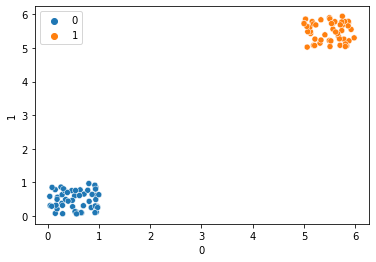

In [ ]:
print(f'Silhouette Score(n=2): {silhouette_score(Z, label)}')
sns.scatterplot(Z[0],Z[1],hue=label)


# Dunn Index
Dunn Index (internal evaluation technique) is useful to identify sets of clusters that are compact and have small variance between the members of the cluster.

$Dunn\, Index =$ $ \frac{\underset{1 \leq i \lt j \leq c}{min} \delta(x_i, y_j)}{\underset{1 \leq k \leq c}{max} \Delta(x_k)}$

In [ ]:
def delta_fast(ck, cl, distances):
    values = distances[np.where(ck)][:, np.where(cl)]
    values = values[np.nonzero(values)]

    return np.min(values)
    
def big_delta_fast(ci, distances):
    values = distances[np.where(ci)][:, np.where(ci)]
    #values = values[np.nonzero(values)]
            
    return np.max(values)

def dunn_fast(points, labels):
    """ Dunn index - FAST (using sklearn pairwise euclidean_distance function)
    
    Parameters
    ----------
    points : np.array
        np.array([N, p]) of all points
    labels: np.array
        np.array([N]) labels of all points
    """
    distances = euclidean_distances(points)
    ks = np.sort(np.unique(labels))
    
    deltas = np.ones([len(ks), len(ks)])*1000000
    big_deltas = np.zeros([len(ks), 1])
    
    l_range = list(range(0, len(ks)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta_fast((labels == ks[k]), (labels == ks[l]), distances)
        
        big_deltas[k] = big_delta_fast((labels == ks[k]), distances)

    di = np.min(deltas)/np.max(big_deltas)
    return di

In [ ]:
print(dunn_fast(Z, label))

5.089790523061119


### Davies Bouldin Index

(if formula doesn't display, see blog)

$Davies-Bouldin\, Index = \frac{1}{c} \sum_{i=1}^{c} \underset{j \neq i}{max} \frac{\sigma_i + \sigma_j}{d(c_i, c_j)}$

Models that give low intra-cluster distances and high inter-cluster distances (desired metrics!) output a low Davies-Bouldin Index. Thus, the lower the Davis-Bouldin Index, the better the model.

Silhouette Score(n=2): 0.10802179943209032


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

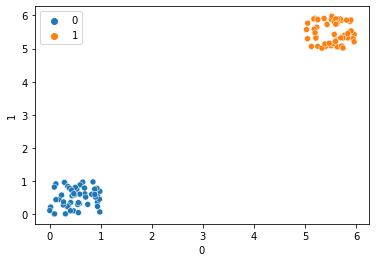

In [ ]:
print(f'Davies Bouldin Index (n=2): {davies_bouldin_score(Z, label)}')
sns.scatterplot(Z,hue=label)

### Calinski-Harabasz Index

$CHI = \frac{trace(B_c)}{trace(W_c)} * \frac{n_E - c}{c - 1}$


7522.0777461001235


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

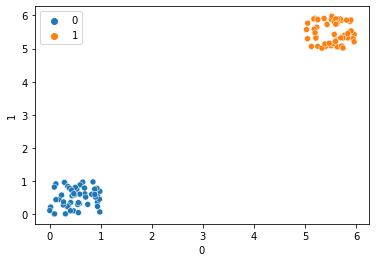

In [ ]:
print(calinski_harabasz_score(Z, label))
sns.scatterplot(Z[0],Z[1],hue=label)

### Purity


In [ ]:

!wget https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv

In [ ]:
iris = pd.read_csv('iris.csv')
iris['species'] = iris.species.map({'setosa':1, 'versicolor':0, 'virginica': 2})
label_iris = iris['species']
iris.drop('species', axis = 1)
x = iris.iloc[:, :-1]
y = iris.iloc[:,   -1]
kmeans = KMeans(n_clusters=3,   max_iter = 100, n_init = 10, random_state = 0) #Applying Kmeans classifier
y_kmeans = kmeans.fit_predict(x)


In [ ]:
y_kmeans = pd.DataFrame(y_kmeans, columns = ['Species'])
# we merge this dataframe with df
prediction = pd.concat([iris, y_kmeans], axis = 1)
  
# We store the clusters
clus0 = prediction.loc[prediction.Species == 0]
clus1 = prediction.loc[prediction.Species == 1]
clus2 = prediction.loc[prediction.Species == 2]
cluster_list = [clus0.values, clus1.values, clus2.values]

In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 
purity_score(prediction['species'], prediction['Species'])

0.8933333333333333

### Normalized Mutual Information

In [ ]:

normalized_mutual_info_score(prediction['species'], prediction['Species'])



0.7581756800057785

### Rand Index (Score) and Adjusted Rand Score

In [ ]:
rand_score(prediction['species'], prediction['Species'])


0.8797315436241611

In [ ]:
adjusted_rand_score(prediction['species'], prediction['Species'])


0.7302382722834697

### Jaccard Score

In [ ]:
jaccard_score(prediction['species'], prediction['Species'], average = 'micro')


0.8072289156626506

### Precision @ N

In [ ]:
def precision_at_k(r, k):
    """Score is precision @ k
    Relevance is binary (nonzero is relevant).
    >>> r = [0, 0, 1]
    >>> precision_at_k(r, 1)
    0.0
    >>> precision_at_k(r, 2)
    0.0
    >>> precision_at_k(r, 3)
    0.33333333333333331
    >>> precision_at_k(r, 4)
    Traceback (most recent call last):
        File "<stdin>", line 1, in ?
    ValueError: Relevance score length < k
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
    Returns:
        Precision @ k
    Raises:
        ValueError: len(r) must be >= k
    """
    assert k >= 1
    r = np.asarray(r)[:k] != 0
    if r.size != k:
        raise ValueError('Relevance score length < k')
    return np.mean(r)

In [ ]:
arr = [1,2,0,0,1,2,1,0,0,1,0,2,1,1]

precision_at_k(arr, 2)

1.0

### Average precision

In [ ]:
def average_precision(r):
    """Score is average precision (area under PR curve)
    Relevance is binary (nonzero is relevant).
    >>> r = [1, 1, 0, 1, 0, 1, 0, 0, 0, 1]
    >>> delta_r = 1. / sum(r)
    >>> sum([sum(r[:x + 1]) / (x + 1.) * delta_r for x, y in enumerate(r) if y])
    0.7833333333333333
    >>> average_precision(r)
    0.78333333333333333
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
    Returns:
        Average precision
    """
    r = np.asarray(r) != 0
    out = [precision_at_k(r, k + 1) for k in range(r.size) if r[k]]
    if not out:
        return 0.
    return np.mean(out)

In [ ]:
arr = [1,2,0,0,1,2,1,0,0,1,0,2,1,1]

average_precision(arr)

0.7136141636141636

### Mean Averge Precision

In [ ]:
def mean_average_precision(rs):
    """Score is mean average precision
    Relevance is binary (nonzero is relevant).
    >>> rs = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1]]
    >>> mean_average_precision(rs)
    0.78333333333333333
    >>> rs = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1], [0]]
    >>> mean_average_precision(rs)
    0.39166666666666666
    Args:
        rs: Iterator of relevance scores (list or numpy) in rank order
            (first element is the first item)
    Returns:
        Mean average precision
    """
    return np.mean([average_precision(r) for r in rs])

In [ ]:
arr 

mean_average_precision([arr])

0.7136141636141636

### Discounted Cumulative Gain

In [ ]:
def dcg_at_k(r, k, method=0):
    """Score is discounted cumulative gain (dcg)
    Relevance is positive real values.  Can use binary
    as the previous methods.
    Example from
    http://www.stanford.edu/class/cs276/handouts/EvaluationNew-handout-6-per.pdf
    >>> r = [3, 2, 3, 0, 0, 1, 2, 2, 3, 0]
    >>> dcg_at_k(r, 1)
    3.0
    >>> dcg_at_k(r, 1, method=1)
    3.0
    >>> dcg_at_k(r, 2)
    5.0
    >>> dcg_at_k(r, 2, method=1)
    4.2618595071429155
    >>> dcg_at_k(r, 10)
    9.6051177391888114
    >>> dcg_at_k(r, 11)
    9.6051177391888114
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
        k: Number of results to consider
        method: If 0 then weights are [1.0, 1.0, 0.6309, 0.5, 0.4307, ...]
                If 1 then weights are [1.0, 0.6309, 0.5, 0.4307, ...]
    Returns:
        Discounted cumulative gain
    """
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
        else:
            raise ValueError('method must be 0 or 1.')
    return 0.


In [ ]:
arr = [1,2,0,0,1,2,1,0,0,1,0,2,1,1]

dcg_at_k(arr, 6)

4.204382172542476

### Normative Discounted Cumulative Gain

In [ ]:
def ndcg_at_k(r, k, method=0):
    """Score is normalized discounted cumulative gain (ndcg)
    Relevance is positive real values.  Can use binary
    as the previous methods.
    Example from
    http://www.stanford.edu/class/cs276/handouts/EvaluationNew-handout-6-per.pdf
    >>> r = [3, 2, 3, 0, 0, 1, 2, 2, 3, 0]
    >>> ndcg_at_k(r, 1)
    1.0
    >>> r = [2, 1, 2, 0]
    >>> ndcg_at_k(r, 4)
    0.9203032077642922
    >>> ndcg_at_k(r, 4, method=1)
    0.96519546960144276
    >>> ndcg_at_k([0], 1)
    0.0
    >>> ndcg_at_k([1], 2)
    1.0
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
        k: Number of results to consider
        method: If 0 then weights are [1.0, 1.0, 0.6309, 0.5, 0.4307, ...]
                If 1 then weights are [1.0, 0.6309, 0.5, 0.4307, ...]
    Returns:
        Normalized discounted cumulative gain
    """
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max



In [ ]:
arr = [1,2,0,0,1,2,1,0,0,1,0,2,1,1]

ndcg_at_k(arr, 6)

0.63902320626571

Mean Reciprical Rank

In [ ]:
def mean_reciprocal_rank(rs):
    """Score is reciprocal of the rank of the first relevant item
    First element is 'rank 1'.  Relevance is binary (nonzero is relevant).
    Example from http://en.wikipedia.org/wiki/Mean_reciprocal_rank
    >>> rs = [[0, 0, 1], [0, 1, 0], [1, 0, 0]]
    >>> mean_reciprocal_rank(rs)
    0.61111111111111105
    >>> rs = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0]])
    >>> mean_reciprocal_rank(rs)
    0.5
    >>> rs = [[0, 0, 0, 1], [1, 0, 0], [1, 0, 0]]
    >>> mean_reciprocal_rank(rs)
    0.75
    Args:
        rs: Iterator of relevance scores (list or numpy) in rank order
            (first element is the first item)
    Returns:
        Mean reciprocal rank
    """
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs])

In [ ]:
arr = [1,2,0,0,1,2,1,0,0,1,0,2,1,1]

mean_reciprocal_rank(arr)

/tmp/ipykernel_105/1806596518.py:20: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
  rs = (np.asarray(r).nonzero()[0] for r in rs)


0.6428571428571429